# NGC 188 - Nicole DePergola

## Parameters

In [2]:
import matplotlib.pyplot as plt
import astropy
from astroquery.gaia import Gaia
import numpy as np
from astropy.modeling import models
from astropy.modeling import fitting
fitter = fitting.LevMarLSQFitter()
from astropy.table import Table, vstack
from scipy.stats import norm
from scipy import integrate
import matplotlib.mlab as mlab
#%matplotlib inline

query_box = """SELECT 
{columns}
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(
  POINT(ra, dec),
  BOX(12, 85.25083, 12, 1))
"""

columns = 'source_id, ra, dec, pmra, pmdec, parallax'

query = query_box.format(columns=columns)

job = Gaia.launch_job_async(query=query)

results = job.get_results()



ra = results['ra']
dec = results['dec']
parallax = results['parallax']
pm_ra = results['pmra']
pm_dec = results['pmdec']


INFO: Query finished. [astroquery.utils.tap.core]


In [2]:
results

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
573359820276049280,14.594194645294063,84.76293751916654,-1.9268593757027894,4.686041836004624,0.9548258679872939
573359820276231808,14.515638008158845,84.7575409184854,5.272501721047039,-3.3280698555952353,1.2698324369722165
573359824570677888,14.594215421009553,84.76241429411944,--,--,--
573359824572968960,14.68710380893151,84.75593175482095,-20.372417782279907,-4.083893009349122,4.108530270569075
573359992074922624,14.471081938804074,84.75292684303932,25.85472494385927,-8.79075016035354,1.350275875164432
573359996371110784,14.328729594203208,84.75625768110646,-2.000046469007234,0.691161843654953,1.0354129753655126
573359996371154688,14.350639106378772,84.7568227677664,--,--,--
573360026434664448,14.410386156319031,84.77215850412634,-3.918711621795654,2.1930167839855965,0.5162249148062003


## Plots

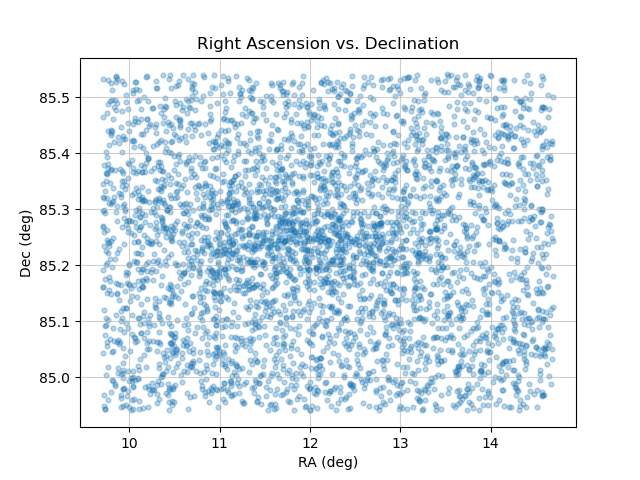

In [9]:
%matplotlib widget
plt.figure
plt.scatter(ra, dec,  alpha=0.3, s=12)
plt.title("Right Ascension vs. Declination")
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")
plt.grid(alpha=0.6)


In [3]:
# zooming in on cluster to make our lives easier
query_box_zoomed = """SELECT 
{columns}
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(
  POINT(ra, dec),
  BOX(12.2, 85.24083, 5, .6))
"""

columns = 'source_id, ra, dec, pmra, pmdec, parallax'

query = query_box_zoomed.format(columns=columns)

job = Gaia.launch_job_async(query=query)

results_zoomed = job.get_results()


ra = results_zoomed['ra']
dec = results_zoomed['dec']
parallax = results_zoomed['parallax']
pm_ra = results_zoomed['pmra']
pm_dec = results_zoomed['pmdec']


INFO: Query finished. [astroquery.utils.tap.core]


In [5]:
results_zoomed

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
573553338620504704,11.824561067915203,84.94169273722179,24.039918185647327,-8.23179131265706,2.0308009465266794
573553510418131968,11.598802205857721,84.94347633247867,--,--,--
573553510419194752,11.621501917446283,84.94550834094203,-1.6544955344941836,0.6840782829356724,0.22458749828021496
573553574841435264,11.459590875206695,84.95161057300413,6.469483319268114,0.23315094153814206,0.5014900126188808
573553574841435648,11.562345625693617,84.9503756395813,70.66489788491765,-41.34333437492088,3.803930416059533
573553574841574528,11.535180553687628,84.9422902351465,1.1508998809872981,2.0441852867813957,0.05704689446190561
573553609201174912,11.61058875669478,84.95210589976155,-1.9399521447765236,1.1467924966882797,-0.06971290745294781
573553609201175040,11.568929969018217,84.95296568474464,3.950531795976377,9.648016214897375,0.28577448779355835


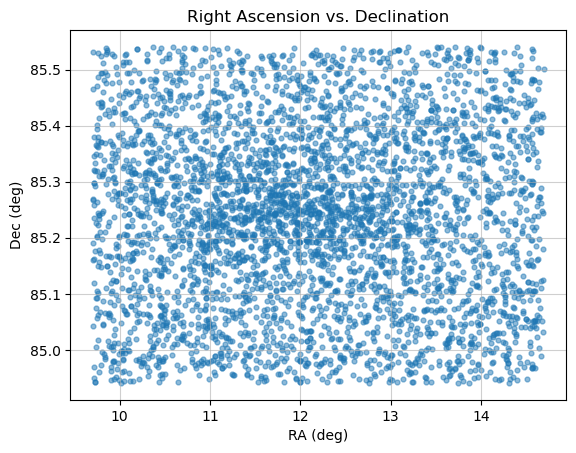

In [7]:
%matplotlib inline
plt.figure()

plt.scatter(ra, dec,  alpha=0.5, s=12)
plt.title("Right Ascension vs. Declination")
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")
plt.grid(alpha=0.6)


### Right Ascension

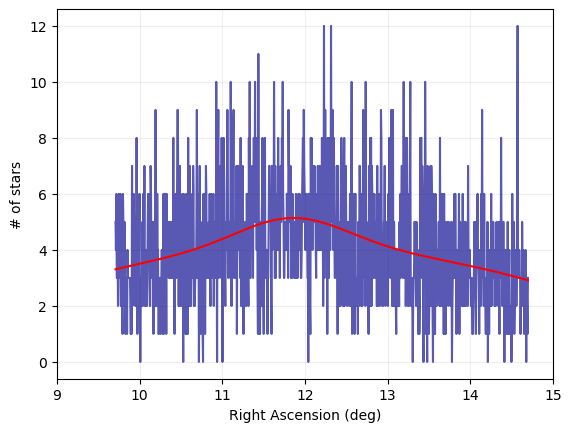

In [8]:
hist, bins = np.histogram(ra, bins=1000, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=5, mean=12, stddev=.1)
poly10 = models.Polynomial1D(degree=2)

combined_model_ra = gauss_model + poly10

model_ra = fitter(combined_model_ra, bins, hist)


plt.figure()
plt.plot(bins, hist, color='darkblue', alpha=0.65)
plt.plot(bins, model_ra(bins), 'r')
plt.xlim(9, 15)
plt.ylabel("# of stars")
plt.xlabel("Right Ascension (deg)")
plt.grid(alpha=0.2)

In [4]:
print(model_ra[0])
print(model_ra[1])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    4.3301620428707155 11.829388395186927 0.9017273776162923
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
           c0                c1                   c2         
    ---------------- ------------------ ---------------------
    7.50534929844398 0.8849706927916862 -0.038996565259240744


In [5]:
cov = fitter.fit_info['param_cov']
err_ra = dict(zip(model_ra.param_names, np.diag(cov)**0.5))
print("Uncertainties: ", err_ra)

Uncertainties:  {'amplitude_0': 0.4775233754156604, 'mean_0': 0.09551543396958985, 'stddev_0': 0.12696797262937506, 'c0_1': 2.1622144614613914, 'c1_1': 0.40861005191858696, 'c2_1': 0.017020168824773575}


In [6]:
FWHM_ra = 2.355 * 0.9017273776162923
FWHM_ra_3x = FWHM_ra * 3
FWHM_ra_arcmin = FWHM_ra * 60
FWHM_ra_3x_arcmin = FWHM_ra_3x*60
print('Size of NGC 188 in right ascension: {:0.5f} arcminutes'.format(FWHM_ra_3x_arcmin))
print('RA very streched.')

Size of NGC 188 in right ascension: 382.24224 arcminutes
RA very streched.


In [7]:
FWHM_ra_3x

6.370703922859105

In [8]:
FWHM_ra

2.1235679742863685

### Declination

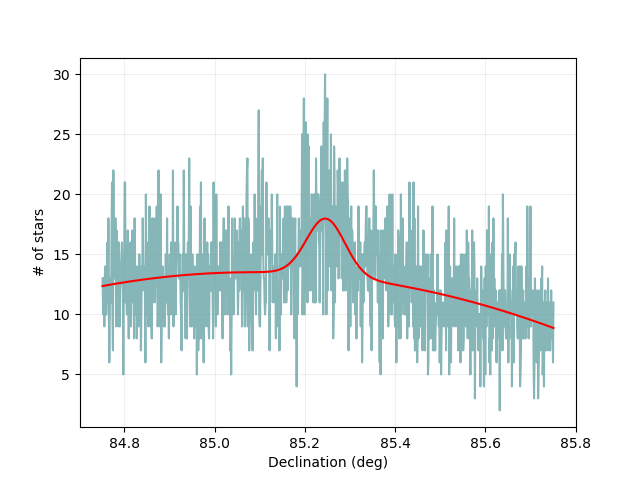

In [9]:

hist, bins = np.histogram(dec, bins=1000, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=3, mean=85.27, stddev=.1)
poly10 = models.Polynomial1D(degree=2)

combined_model_dec = gauss_model + poly10

model_dec = fitter(combined_model_dec, bins, hist, maxiter=10000)


plt.figure()
plt.plot(bins, hist, color='cadetblue', alpha=0.75)
plt.plot(bins, model_dec(bins), 'r')
plt.ylabel("# of stars")
plt.xlabel("Declination (deg)")
plt.grid(alpha=0.2)

In [10]:
print(model_dec[0])
print(model_dec[1])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev       
    ----------------- ----------------- --------------------
    4.743688831660663 85.24615471069066 0.042476106834345814
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
            c0                 c1                 c2        
    ------------------ ----------------- -------------------
    -75632.32158881615 1778.148729903456 -10.449394983288565


In [11]:
cov = fitter.fit_info['param_cov']
err_dec = dict(zip(model_dec.param_names, np.diag(cov)**0.5))
print("Uncertainties: ", err_dec)

Uncertainties:  {'amplitude_0': 0.5545012918695279, 'mean_0': 0.005475791270725633, 'stddev_0': 0.0061390029643815834, 'c0_1': 13877.301670601772, 'c1_1': 325.56900884386346, 'c2_1': 1.9094813029942856}


In [12]:
FWHM_dec = 2.355 * 0.042476106834345814 * 3
FWHM_dec_arcmin = FWHM_dec*60
print('Size of NGC 188 in declination: {:0.5f} arcminutes'.format(FWHM_dec_arcmin))

Size of NGC 188 in declination: 18.00562 arcminutes


In [13]:
FWHM_dec

0.3000936947846532

### Parallax

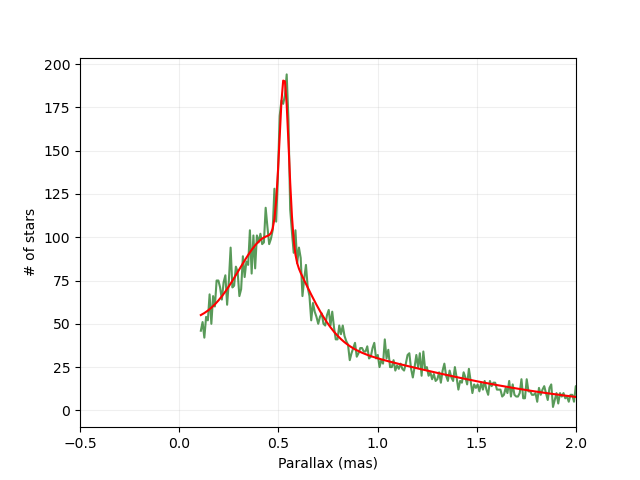

In [14]:
parallax = parallax[~np.isnan(parallax)]
parallax = parallax[parallax>0.1]

hist, bins = np.histogram(parallax, bins=2000, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=110, mean=.54, stddev=.07)
gauss_model2 = models.Gaussian1D(amplitude=115, mean=.42, stddev=.32)
gauss_model3 = models.Gaussian1D(amplitude=30, mean=1.2, stddev=.1)

combined_model_plx = gauss_model + gauss_model2 + gauss_model3

model_plx = fitter(combined_model_plx, bins, hist, maxiter=10000)


plt.figure()
plt.plot(bins, hist, color='darkgreen', alpha=0.65)
plt.plot(bins, model_plx(bins), 'r')
plt.xlim(-0.5, 2)
plt.ylabel("# of stars")
plt.xlabel("Parallax (mas)")
plt.grid(alpha=0.2)

In [15]:
print(model_plx[0])
print(model_plx[1])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean               stddev      
    ----------------- ------------------ -------------------
    96.30137316409728 0.5290599390741887 0.02324180426767619
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ----------------- ------------------- ------------------
    56.96948826406729 0.46847195705198275 0.1648596331183803


In [16]:
cov = fitter.fit_info['param_cov']
err_plx = dict(zip(model_plx.param_names, np.diag(cov)**0.5))
print("Uncertainties: ", err_plx)

Uncertainties:  {'amplitude_0': 1.3545043388491043, 'mean_0': 0.00034927400166282206, 'stddev_0': 0.000409858084616037, 'amplitude_1': 0.8298549215718111, 'mean_1': 0.002817451803382254, 'stddev_1': 0.0035161913293279574, 'amplitude_2': 2.105357924193662, 'mean_2': 0.07025955780010193, 'stddev_2': 0.03031036209574546}


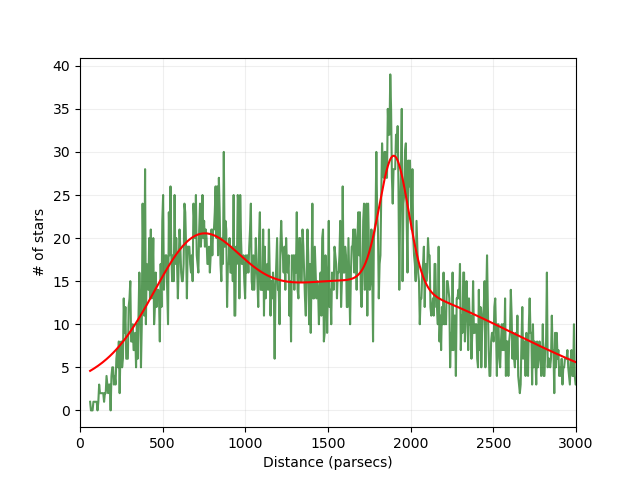

In [17]:
plx_arcmin = parallax / 1000
distance = 1/plx_arcmin

hist, bins = np.histogram(distance, bins=2000, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=4, mean=1500, stddev=250)
gauss_model2 = models.Gaussian1D(amplitude=18, mean=1800, stddev=200)
gauss_model3 = models.Gaussian1D(amplitude=5, mean=500, stddev=60)

combined_model_dist = gauss_model + gauss_model2 + gauss_model3

model_dist = fitter(combined_model_dist, bins, hist, maxiter=10000)


plt.figure()
plt.plot(bins, hist, color='darkgreen', alpha=0.65)
plt.plot(bins, model_dist(bins), 'r')
plt.xlim(0, 3000)
plt.ylabel("# of stars")
plt.xlabel("Distance (parsecs)")
plt.grid(alpha=0.2)

In [18]:
print(model_dist[0])
print(model_dist[1])
print(model_dist[2])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev     
    ------------------ ------------------ -----------------
    15.066059617752245 1626.4293771703835 975.2096382980358
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean             stddev     
    ------------------ ----------------- -----------------
    15.067184672855838 1899.425197501132 87.19938497988065
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean             stddev      
    ------------------ ----------------- ------------------
    10.708762825706042 698.8343842924803 251.71206808882744


In [19]:
cov = fitter.fit_info['param_cov']
err_dist = dict(zip(model_dist.param_names, np.diag(cov)**0.5))
print("Uncertainties: ", err_dist)

Uncertainties:  {'amplitude_0': 0.25902681134037364, 'mean_0': 37.81811883612612, 'stddev_0': 27.700572014358936, 'amplitude_1': 0.5653350803952363, 'mean_1': 3.6553510550779174, 'stddev_1': 4.026211440044688, 'amplitude_2': 0.6181011035225933, 'mean_2': 10.063916666174057, 'stddev_2': 16.72968695011723}


In [20]:
FWHM_dist = 2.355 * 87.19938497988065
#depth = 1/FWHM_plx
print('Depth of NGC 188 via Gaussian: {:0.3f} pcs'.format(FWHM_dist))

angle = FWHM_dec_arcmin/2/60

mean_dist = 1899.425197501132 # mean of distance plot

radius = np.tan(angle)*mean_dist

print('Width of NGC 188 via trigonometry: {:0.3f} pcs \n'.format(radius))

print('Distance to NGC 188: {:0.3f} pcs'.format(mean_dist))

Depth of NGC 188 via Gaussian: 205.355 pcs
Width of NGC 188 via trigonometry: 287.161 pcs 

Distance to NGC 188: 1899.425 pcs


### Proper Motion (Right Ascension)

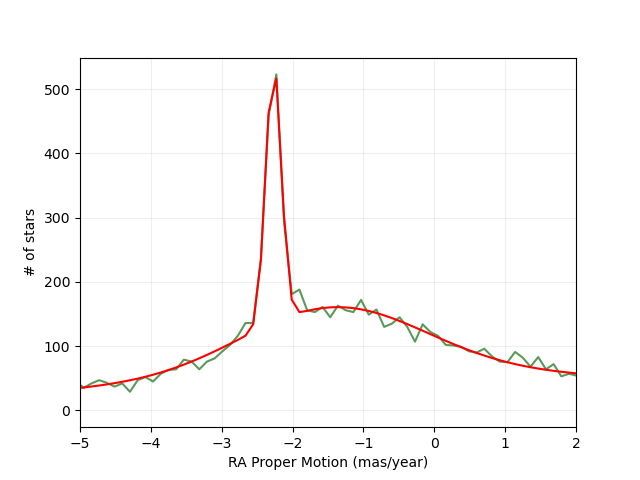

In [2]:
pm_ra = pm_ra[~np.isnan(pm_ra)]

hist, bins = np.histogram(pm_ra, bins=3000, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=150, mean= -2.5, stddev=.4)

gauss_model2 = models.Gaussian1D(amplitude=25, mean=-1.3, stddev=3.5)

gauss_model3 = models.Gaussian1D(amplitude=50, mean=-2.4, stddev=1.4)


combined_model_pmra = gauss_model + gauss_model2 + gauss_model3 #+ gauss_model4

model_pmra = fitter(combined_model_pmra, bins, hist, maxiter=10000)

%matplotlib widget
plt.figure()
plt.plot(bins, hist, color='darkgreen', alpha=0.65)
plt.plot(bins, model_pmra(bins), 'r')
plt.xlim(-5, 2)
plt.ylabel("# of stars")
plt.xlabel("RA Proper Motion (mas/year)")
plt.grid(alpha=0.2)

In [3]:
print(model_pmra[0])
print(model_pmra[1])
print(model_pmra[2])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean               stddev      
    ----------------- ------------------- -------------------
    404.4489841669183 -2.2691449926806997 0.10876390172609096
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean             stddev     
    ----------------- ------------------- ----------------
    57.53131517487532 0.32059704596433275 4.99667566897625
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    106.51944585011437 -1.422145069780339 1.3016720082378384


In [4]:
cov = fitter.fit_info['param_cov']
err_pmra = dict(zip(model_pmra.param_names, np.diag(cov)**0.5))
print("Uncertainties: ", err_pmra)

Uncertainties:  {'amplitude_0': 2.0419393069281813, 'mean_0': 0.0006194893843708674, 'stddev_0': 0.0006634208642897736, 'amplitude_1': 0.6295235896835387, 'mean_1': 0.03766406839036146, 'stddev_1': 0.03733701434022432, 'amplitude_2': 0.8151398684338718, 'mean_2': 0.009647410068243165, 'stddev_2': 0.011494469840663886}


In [5]:
FWHM_pmra = 2.355 * 0.10876390172609096
area_pmra = (404.4489841669183*FWHM_pmra)/0.3989
print('Number of stars in NGC 188: {:0.0f}'.format(area_pmra))

Number of stars in NGC 188: 260


### Proper Motion (Declination)

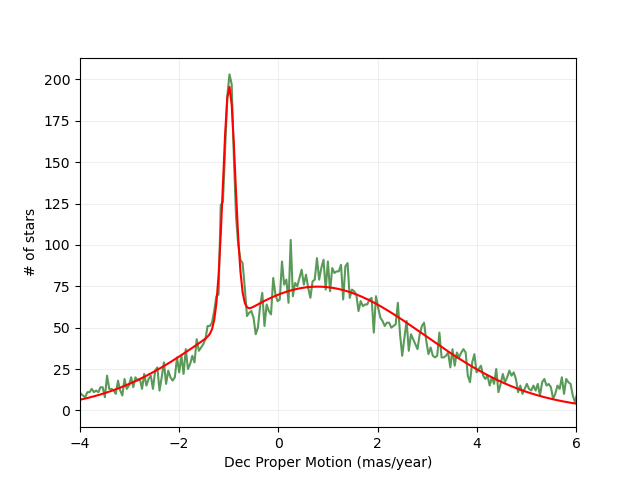

In [6]:
pm_dec = pm_dec[~np.isnan(pm_dec)]

hist, bins = np.histogram(pm_dec, bins=3000, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=110, mean= -0.9, stddev=1.7)

gauss_model2 = models.Gaussian1D(amplitude=75, mean=1.5, stddev=3.5)


combined_model_pmdec = gauss_model + gauss_model2

model_pmdec = fitter(combined_model_pmdec, bins, hist, maxiter=10000)


plt.figure()
plt.plot(bins, hist, color='darkgreen', alpha=0.65)
plt.plot(bins, model_pmdec(bins), 'r')
plt.xlim(-4, 6)
plt.ylabel("# of stars")
plt.xlabel("Dec Proper Motion (mas/year)")
plt.grid(alpha=0.2)

In [31]:
print(model_pmdec[0])
print(model_pmdec[1])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean               stddev      
    ------------------ ------------------ -------------------
    142.32281377401725 -0.993717407473306 0.12405188728125109
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev      
    ----------------- ------------------ ------------------
    74.77012208426136 0.7890931922120644 2.1624553705089866


In [32]:
cov = fitter.fit_info['param_cov']
err_pmdec = dict(zip(model_pmdec.param_names, np.diag(cov)**0.5))
print("Uncertainties: ", err_pmdec)

Uncertainties:  {'amplitude_0': 1.4481978212406668, 'mean_0': 0.0014374918342369126, 'stddev_0': 0.0014970899189293996, 'amplitude_1': 0.35034871307620546, 'mean_1': 0.012224760658970059, 'stddev_1': 0.01146191739676191}


In [33]:
FWHM_pmdec = 2.355 * 0.12405188728125109
area_pmdec = (142.32281377401725 * FWHM_pmdec) / 0.3989
print('Number of stars in NGC 188: {:0.0f}'.format(area_pmdec))

Number of stars in NGC 188: 104


---------------

-----

## Refined Search

#### Using constraints found above

In [118]:
import matplotlib.pyplot as plt
import astropy
from astroquery.gaia import Gaia
import numpy as np
from astropy.modeling import models
from astropy.modeling import fitting
fitter = fitting.LevMarLSQFitter()
from astropy.table import Table, vstack
from scipy.stats import norm
from scipy import integrate
import matplotlib.mlab as mlab
%matplotlib inline


# zooming in on cluster to make our lives easier
query_box_zoomed = """SELECT 
{columns}
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(
  POINT(ra, dec),
  BOX(12.2, 85.24083, 3.61699411, 0.3000936947846532))
"""
# ra span found by dec_spac divided by cosine of center declination

columns = 'source_id, ra, dec, pmra, pmdec, parallax'

query = query_box_zoomed.format(columns=columns)

job = Gaia.launch_job_async(query=query)

results_zoomed = job.get_results()


ra = results_zoomed['ra']
dec = results_zoomed['dec']
parallax = results_zoomed['parallax']
pm_ra = results_zoomed['pmra']
pm_dec = results_zoomed['pmdec']


INFO: Query finished. [astroquery.utils.tap.core]


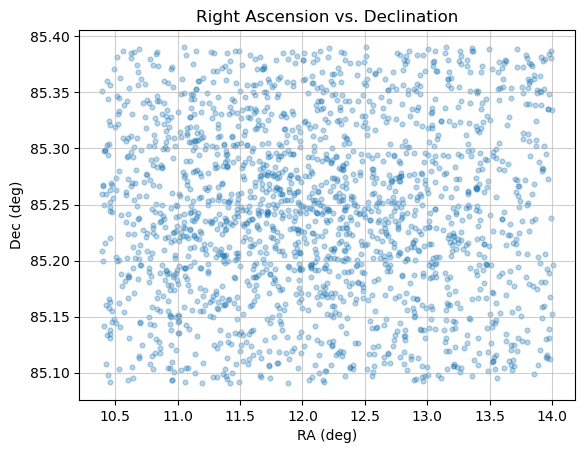

In [119]:

plt.scatter(ra, dec,  alpha=0.3, s=12)
plt.title("Right Ascension vs. Declination")
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")
plt.grid(alpha=0.6)


## Plots

### Right Ascension

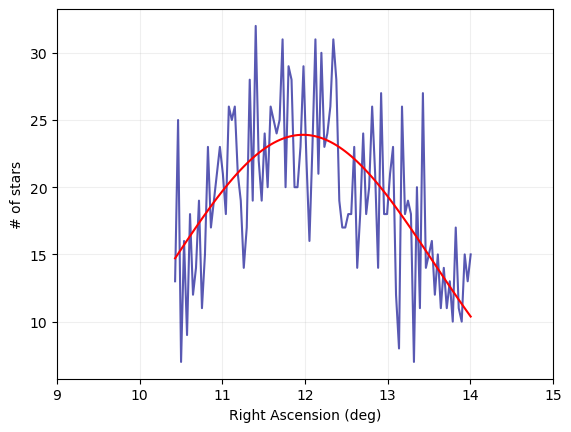

In [120]:
hist, bins = np.histogram(ra, bins=100, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=5, mean=12, stddev=.1)
#poly10 = models.Polynomial1D(degree=2)

combined_model_ra = gauss_model

model_ra = fitter(combined_model_ra, bins, hist)


plt.figure()
plt.plot(bins, hist, color='darkblue', alpha=0.65)
plt.plot(bins, model_ra(bins), 'r')
plt.xlim(9, 15)
plt.ylabel("# of stars")
plt.xlabel("Right Ascension (deg)")
plt.grid(alpha=0.2)

In [121]:
print(model_ra)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    23.899035436527654 11.975253981560243 1.5702952211613468


In [122]:
cov = fitter.fit_info['param_cov']
err_ra = dict(zip(model_ra.param_names, np.diag(cov)**0.5))
print("Uncertainties: ", err_ra)

Uncertainties:  {'amplitude': 0.7485469390402647, 'mean': 0.06982804724850408, 'stddev': 0.11053297070038498}


In [123]:
FWHM_ra = 2.355 * 1.5702952211613468 * 3
FWHM_ra_arcmin = FWHM_ra*60
print('Size of NGC 188 in right ascension: {:0.5f} arcminutes'.format(FWHM_ra_arcmin))
print('RA very streched.')

Size of NGC 188 in right ascension: 665.64814 arcminutes
RA very streched.


In [124]:
FWHM_ra

11.094135737504914

### Declination

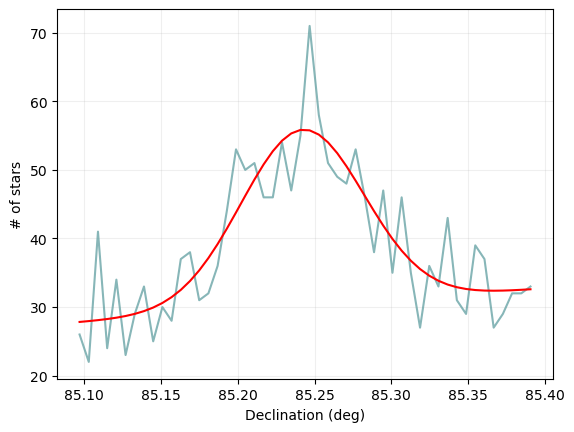

In [125]:

hist, bins = np.histogram(dec, bins=50, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=3, mean=85.27, stddev=.03)
poly10 = models.Polynomial1D(degree=1)

combined_model_dec = gauss_model + poly10

model_dec = fitter(combined_model_dec, bins, hist, maxiter=10000)


plt.figure()
plt.plot(bins, hist, color='cadetblue', alpha=0.75)
plt.plot(bins, model_dec(bins), 'r')
plt.ylabel("# of stars")
plt.xlabel("Declination (deg)")
plt.grid(alpha=0.2)

In [126]:
print(model_dec[0])
print(model_dec[1])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev      
    ----------------- ----------------- -------------------
    25.71306432944909 85.24210601398687 0.04007517299469334
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 1
Parameters:
             c0                 c1        
    ------------------- ------------------
    -1355.2276861909506 16.252329734387704


In [127]:
cov = fitter.fit_info['param_cov']
err_dec = dict(zip(model_dec.param_names, np.diag(cov)**0.5))
print("Uncertainties: ", err_dec)

Uncertainties:  {'amplitude_0': 2.2701001461847996, 'mean_0': 0.004097604447538706, 'stddev_0': 0.004847736521376085, 'c0_1': 877.7236981387746, 'c1_1': 10.296158747782528}


In [128]:
FWHM_dec = 2.355 * 0.04007517299469334 * 3
FWHM_dec_arcmin = FWHM_dec*60
print('Size of NGC 188 in declination: {:0.5f} arcminutes'.format(FWHM_dec_arcmin))

Size of NGC 188 in declination: 16.98787 arcminutes


In [129]:
FWHM_dec

0.28313109720750845

### Parallax

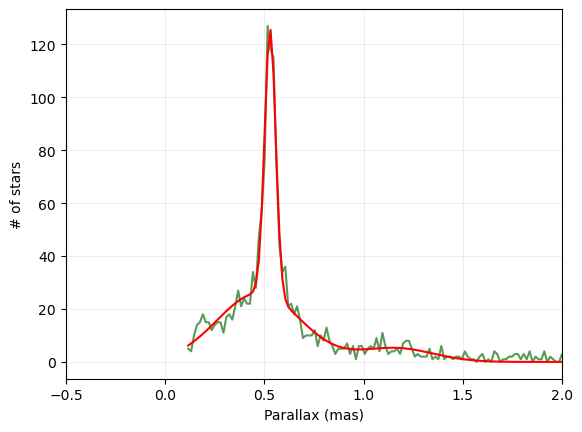

In [130]:
parallax = parallax[~np.isnan(parallax)]
parallax = parallax[parallax>0.1]

hist, bins = np.histogram(parallax, bins=500, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=110, mean=.54, stddev=.07)
gauss_model2 = models.Gaussian1D(amplitude=115, mean=.42, stddev=.32)
gauss_model3 = models.Gaussian1D(amplitude=30, mean=1.2, stddev=.1)

combined_model_plx = gauss_model + gauss_model2 + gauss_model3

model_plx = fitter(combined_model_plx, bins, hist, maxiter=10000)


plt.figure()
plt.plot(bins, hist, color='darkgreen', alpha=0.65)
plt.plot(bins, model_plx(bins), 'r')
plt.xlim(-0.5, 2)
plt.ylabel("# of stars")
plt.xlabel("Parallax (mas)")
plt.grid(alpha=0.2)

In [131]:
print(model_plx[0])
print(model_plx[1])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean               stddev       
    ------------------ ------------------ --------------------
    100.70399232150292 0.5296697072275968 0.028010388336098587
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean               stddev      
    ------------------ ------------------- -------------------
    25.986645650495152 0.47248237866403414 0.21063816666979193


In [132]:
cov = fitter.fit_info['param_cov']
err_plx = dict(zip(model_plx.param_names, np.diag(cov)**0.5))
print("Uncertainties: ", err_plx)

Uncertainties:  {'amplitude_0': 1.2663104710067072, 'mean_0': 0.00038405131533736305, 'stddev_0': 0.00043940377543326523, 'amplitude_1': 0.6456389237515066, 'mean_1': 0.0050748079172527, 'stddev_1': 0.006487055013707744, 'amplitude_2': 0.45777433404094336, 'mean_2': 0.023235270144558003, 'stddev_2': 0.024285322665691302}


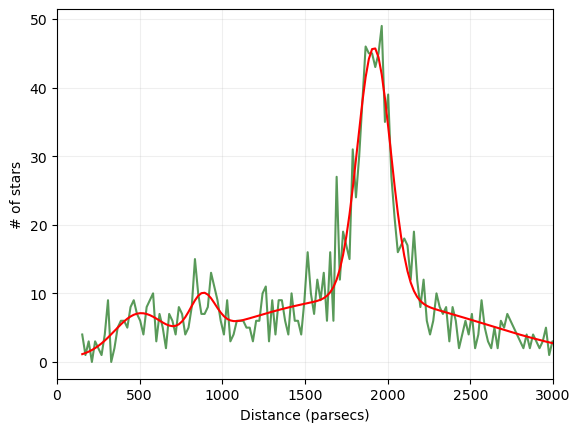

In [133]:
plx_arcmin = parallax / 1000
distance = 1/plx_arcmin

hist, bins = np.histogram(distance, bins=500, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=4, mean=1500, stddev=250)
gauss_model2 = models.Gaussian1D(amplitude=18, mean=1800, stddev=200)
gauss_model3 = models.Gaussian1D(amplitude=5, mean=500, stddev=60)
gauss_model4 = models.Gaussian1D(amplitude=15, mean=800, stddev=60)

combined_model_dist = gauss_model + gauss_model2 + gauss_model3 + gauss_model4

model_dist = fitter(combined_model_dist, bins, hist, maxiter=10000)


plt.figure()
plt.plot(bins, hist, color='darkgreen', alpha=0.65)
plt.plot(bins, model_dist(bins), 'r')
plt.xlim(0, 3000)
plt.ylabel("# of stars")
plt.xlabel("Distance (parsecs)")
plt.grid(alpha=0.2)

In [134]:
print(model_dist[0])
print(model_dist[1])
print(model_dist[2])
print(model_dist[3])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev     
    ----------------- ------------------ -----------------
    9.283244513528055 1819.8269535680968 752.8223844646984
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean             stddev     
    ------------------ ---------------- -----------------
    36.637165835568766 1916.90899062992 99.91874819637628
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean             stddev      
    ----------------- ----------------- ------------------
    5.119932458702494 489.7118497473277 144.17449721470155
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean             stddev     
    ----------------- ----------------- -----------------
    5.695446948698554 881.1871593933653 

In [135]:
cov = fitter.fit_info['param_cov']
err_dist = dict(zip(model_dist.param_names, np.diag(cov)**0.5))
print("Uncertainties: ", err_dist)

Uncertainties:  {'amplitude_0': 0.4561131043335779, 'mean_0': 39.910031253962856, 'stddev_0': 48.78597939187739, 'amplitude_1': 0.8353135217121541, 'mean_1': 2.408445849379113, 'stddev_1': 2.8610491024131974, 'amplitude_2': 0.7860503674921784, 'mean_2': 22.579144936263706, 'stddev_2': 26.926959478431883, 'amplitude_3': 0.9408572389780395, 'mean_3': 15.347498164111128, 'stddev_3': 16.401365818215634}


In [136]:
FWHM_dist = 2.355 * 99.91874819637628
#depth = 1/FWHM_plx
print('Depth of NGC 188 via Gaussian: {:0.3f} pcs'.format(FWHM_dist))

angle = FWHM_dec_arcmin/2/60

mean_dist = 1916.90899062992

radius = np.tan(angle)*mean_dist

print('Width of NGC 188 via trigonometry: {:0.3f} pcs \n'.format(radius))

print('Distance to NGC 188: {:0.3f} pcs'.format(mean_dist))

Depth of NGC 188 via Gaussian: 235.309 pcs
Width of NGC 188 via trigonometry: 273.196 pcs 

Distance to NGC 188: 1916.909 pcs


### Proper Motion (Right Ascension)

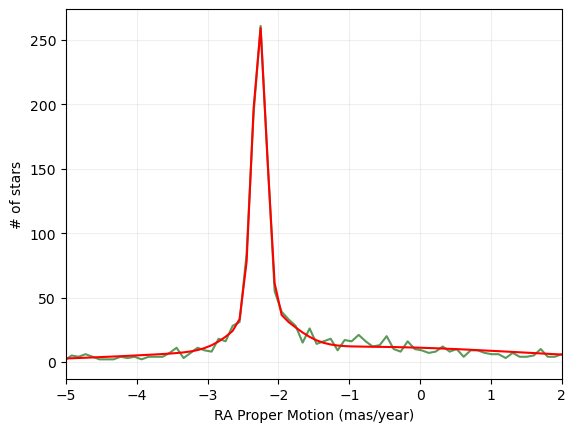

In [137]:
pm_ra = pm_ra[~np.isnan(pm_ra)]

hist, bins = np.histogram(pm_ra, bins=1000, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=150, mean= -2.5, stddev=.4)

gauss_model2 = models.Gaussian1D(amplitude=25, mean=-1.3, stddev=3.5)

gauss_model3 = models.Gaussian1D(amplitude=50, mean=-2.4, stddev=2.4)


combined_model_pmra = gauss_model + gauss_model2 + gauss_model3 

model_pmra = fitter(combined_model_pmra, bins, hist, maxiter=10000)


plt.figure()
plt.plot(bins, hist, color='darkgreen', alpha=0.65)
plt.plot(bins, model_pmra(bins), 'r')
plt.xlim(-5, 2)
plt.ylabel("# of stars")
plt.xlabel("RA Proper Motion (mas/year)")
plt.grid(alpha=0.2)

In [138]:
print(model_pmra[0])
print(model_pmra[1])
print(model_pmra[2])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean               stddev      
    ------------------ ------------------ -------------------
    224.01791628158017 -2.268612194347573 0.10112900401573473
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev      
    ------------------ ------------------- ------------------
    11.815426409674584 -0.8851252296162758 2.3883391235760056
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean               stddev      
    ------------------ ------------------ -------------------
    28.600075149209555 -2.192366552330729 0.39765420780547994


In [139]:
cov = fitter.fit_info['param_cov']
err_pmra = dict(zip(model_pmra.param_names, np.diag(cov)**0.5))
print("Uncertainties: ", err_pmra)

Uncertainties:  {'amplitude_0': 1.533001917606473, 'mean_0': 0.0006012077870358498, 'stddev_0': 0.0008151225975376942, 'amplitude_1': 0.30085805239973806, 'mean_1': 0.062380547892081584, 'stddev_1': 0.054104186340920304, 'amplitude_2': 1.278185563767056, 'mean_2': 0.01021799201755429, 'stddev_2': 0.014128738483463287}


In [110]:
FWHM_pmra = 2.355 * 0.10112900401573473
area_pmra = (224.01791628158017 * FWHM_pmra) / 0.3989
print('Number of stars in NGC 188: {:0.0f}'.format(area_pmra))

Number of stars in NGC 188: 134


### Proper Motion (Declination)

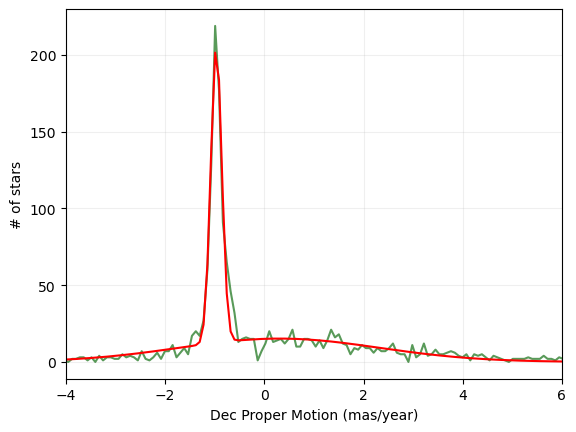

In [111]:
pm_dec = pm_dec[~np.isnan(pm_dec)]

hist, bins = np.histogram(pm_dec, bins=1000, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=110, mean= -0.9, stddev=1.7)

gauss_model2 = models.Gaussian1D(amplitude=20, mean=0.8, stddev=3.5)


combined_model_pmdec = gauss_model + gauss_model2

model_pmdec = fitter(combined_model_pmdec, bins, hist, maxiter=10000)


plt.figure()
plt.plot(bins, hist, color='darkgreen', alpha=0.65)
plt.plot(bins, model_pmdec(bins), 'r')
plt.xlim(-4, 6)
plt.ylabel("# of stars")
plt.xlabel("Dec Proper Motion (mas/year)")
plt.grid(alpha=0.2)

In [112]:
print(model_pmdec[0])
print(model_pmdec[1])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean               stddev      
    ------------------ ------------------- -------------------
    193.46703081674156 -0.9677117085476703 0.11040423266139396
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
       amplitude            mean              stddev     
    ---------------- ------------------ -----------------
    15.2165470074131 0.3025796806753427 2.014060261001579


In [113]:
cov = fitter.fit_info['param_cov']
err_pmdec = dict(zip(model_pmdec.param_names, np.diag(cov)**0.5))
print("Uncertainties: ", err_pmdec)

Uncertainties:  {'amplitude_0': 1.4939037403838842, 'mean_0': 0.0009718182963469735, 'stddev_0': 0.0010096630912910546, 'amplitude_1': 0.36374681503048145, 'mean_1': 0.05549451187284732, 'stddev_1': 0.052834348080468385}


In [114]:
FWHM_pmdec = 2.355 * 0.11040423266139396
area_pmdec = (193.46703081674156 * FWHM_pmdec) / 0.3989
print('Number of stars in NGC 188: {:0.0f}'.format(area_pmdec))

Number of stars in NGC 188: 126


----------------